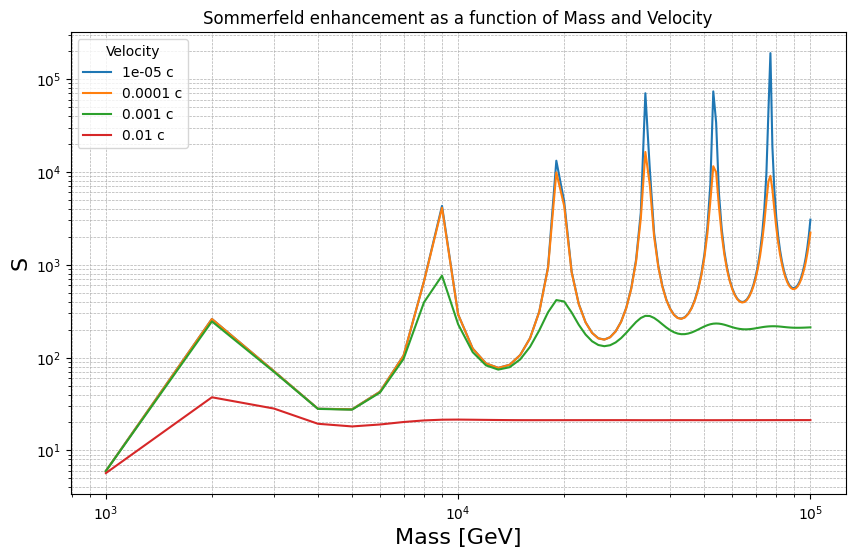

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# ** Constants **
xmin = 1e-10
mPhi = 90  # GeV/c^2
alpha = 1 / 30
stopEvaluate = 60

# Functions
def b(v, M):
    return mPhi / (v * M)

def a(v):
    return alpha / v

def logspace(increments, start, end):
    return np.exp(np.linspace(np.log(start), np.log(end), increments))

# Differential equation function
def differential_eq(x, y, v, M):
    a_v = a(v)
    b_vM_x = b(v, M) * x
    dydx = [
        y[1],
        -(2 / x) * y[1] - (1 + 2 * (a_v * np.exp(-b_vM_x)) / x) * y[0]
    ]
    return dydx

# Solve SE and compute quantities
def compute_sommerfeld(v, M):
    sol = solve_ivp(
        differential_eq, [xmin, stopEvaluate], [1, -a(v)], args=(v, M),
        dense_output=True, max_step=np.inf
    )
    y_sol = sol.sol
    x_values = stopEvaluate
    phi_vMx = lambda x: x * y_sol(x)[0]

    # Compute Csquared
    csquared_no_limit = phi_vMx(stopEvaluate)**2 + phi_vMx(stopEvaluate - np.pi / 2)**2
    sommerfeld = 1 / csquared_no_limit
    return sommerfeld

# Plot
def plot_sommerfeld():
    velocities = [10**i for i in range(-5, -1)]
    mass_range = np.linspace(1000, 100000, 100)

    plt.figure(figsize=(10, 6))
    for v in velocities:
        sommerfeld_values = [compute_sommerfeld(v, M) for M in mass_range]
        plt.loglog(mass_range, sommerfeld_values, label=f"{v} c")

    # plt.xscale("log")
    # plt.yscale("log")
    plt.xlabel("Mass [GeV]", fontsize=16)
    plt.ylabel("S", fontsize=16)
    plt.legend(title="Velocity")
    plt.title("Sommerfeld enhancement as a function of Mass and Velocity")
    plt.grid(True, which="both", linestyle="--", lw=0.5)
    plt.show()

# Run plot function
plot_sommerfeld()
